# Project Performance and Status Overview 

## Table of Contents

1. [**Introduction**](#1)
	- Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries
    - Reading in Data
    - Exploring Data
3. [**Data Cleaning**](#3)
4. [**Data Analysis & Visualization**](#4)

# 1

## Introduction


## Project Description

In this project, my goal is to provide a detailed analysis of project performance, customer account distribution, and key operational metrics. By transforming complex data into meaningful information, the report seeks to empower decision-makers with the knowledge needed to optimize project management, enhance resource allocation, and improve customer relationship strategies.

## Data Description

This project is a compendium of 5 datasets: `Accounts Dataset`, `Issues Dataset`, `Worklog Dataset`, `Customers Dataset`, `Users Dataset`.
Below is a description of each individual dataset.


### Accounts Dataset

**Key Columns:** `AccountName`, `AccountKey`, `Status`, `CategoryName`, `CustomerKey`

**Objective:** This dataset provides an overview of billing units (Accounts) associated with each customer. Each account’s status and category could be used to differentiate between open/closed and internal/group classifications.

### Issues Dataset

**Key Columns:** `Issue id`, `Issue Type`, `Status`, `Resolution`, `Created`, `Updated`, `Resolved`, `ProjectName`, `ProjectKey`, `IssueKey`

**Objective:** This dataset represents the various tasks (or issues) tied to projects, with important time-related fields like `Created`, `Resolved`, and `Due date`, and the specific `Status` of each task. We’ll use this to analyze task progress and project health.

### Worklog Dataset

**Key Columns:** `WorklogId`, `IssueId`, `timeSpentSeconds`, `billableSeconds`, `AccountKey`, `UserKey`

**Objective:** The worklog dataset tracks time spent by each team member on tasks. This is crucial for analyzing team member utilization and the division between billable and non-billable time.

### Customers Dataset


**Key Columns:** `CustomerName`, `CustomerKey`, `CustomerId`

**Objective:** This dataset contains customer information and will serve as a reference to link accounts with specific customers.

## User Dataset

**Key Columns:** `User`, `UserKey`

**Objective:** This dataset identifies team members by name and provides a unique key for each user. This will be essential in linking user activities in the worklog.

# 2

# Importing Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading in the datsets

In [5]:
accounts_df = pd.read_csv("C:/Users/HP/Documents/Tableau Project/old/Accounts (1).csv") #loading in the accounts dataset
issues_df = pd.read_csv("C:/Users/HP/Documents/Tableau Project/old/issues (1).csv") #loading in the issues dataset
worklog_df = pd.read_csv("C:/Users/HP/Documents/Tableau Project/old/worklogs (1).csv") #loading in the worklog dataset
customers_df = pd.read_csv("C:/Users/HP/Documents/Tableau Project/old/Customers (1).csv") #loading in the customers dataset
users_df = pd.read_csv("C:/Users/HP/Documents/Tableau Project/old/users (1).csv") #loading in the users dataset

# 3

## Data Cleaning

### Accounts Dataset

In [6]:
# Display the column names of the dataframe
accounts_df.columns  

# Display information about the dataframe, including data types and non-null counts
accounts_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AccountName   64 non-null     object
 1   AccountKey    64 non-null     object
 2   Status        64 non-null     object
 3   CategoryName  63 non-null     object
 4   CustomerKey   63 non-null     object
dtypes: object(5)
memory usage: 2.6+ KB


In [7]:
# Return the descriptive statistics of the dataframe
accounts_df.describe()  

,AccountName,AccountKey,Status,CategoryName,CustomerKey
count,64,64,64,63,63
unique,64,63,2,4,15
top,Cyberdyne-Strategy,GHR,OPEN,Internal,CYB-104
freq,1,2,52,31,33


In [8]:
# Display the first 10 rows of the dataframe
accounts_df.head(10)  

,AccountName,AccountKey,Status,CategoryName,CustomerKey
0,Cyberdyne-Strategy,CYBSTRAT,OPEN,Internal,CYB-104
1,Cyberdyne-NL,CYBNL,OPEN,Group,CYB-101
2,Cyb-Rebrand,CYBRB,CLOSED,Internal,CYB-104
3,NanotechProject,ST-NP,OPEN,Group,STARK
4,Cyberdyn-ME,CYBME,OPEN,Internal,CYB-104
5,CybSystemA,CYBSA,OPEN,Internal,CYB-104
6,CybSystemB,CYBSB,OPEN,Internal,CYB-104
7,CybSystemC,SYBSC,OPEN,Internal,CYB-104
8,CybSystemD,SYBSD,OPEN,Internal,CYB-104
9,InfoSystem,SYB_INF,OPEN,Internal,CYB-104


In [9]:
# Return the count of unique values in the 'CategoryName' column
accounts_df['CategoryName'].value_counts()  

CategoryName
Internal        31
Group           13
Non-billable    12
External         7
Name: count, dtype: int64

In [10]:
# Check the count of unique values in the 'Status' column to assess consistency (e.g., "OPEN", "CLOSED")
accounts_df['Status'].value_counts()  

Status
OPEN      52
CLOSED    12
Name: count, dtype: int64

In [11]:
# Count the total number of non-null entries in the 'AccountKey' column
accounts_df['AccountKey'].count()  


64

In [12]:
# Count the occurrences of each unique value in the 'CategoryName' column
accounts_df['CategoryName'].value_counts()  


CategoryName
Internal        31
Group           13
Non-billable    12
External         7
Name: count, dtype: int64

In [13]:
# Count the occurrences of each unique value in the 'CustomerKey' column
accounts_df['CustomerKey'].value_counts()  

CustomerKey
CYB-104       33
Triop         12
CAKE           4
STARK          2
UC-001         2
CYB-101        1
LexC           1
MC             1
SCC            1
WEY-YUT100     1
Hyperion       1
LI_100         1
Aras-383       1
TA             1
SPE-07         1
Name: count, dtype: int64

In [14]:
# Check for missing values in each column by summing the number of NaN values
accounts_df.isna().sum()  


AccountName     0
AccountKey      0
Status          0
CategoryName    1
CustomerKey     1
dtype: int64

#### Handling missing values

#### For Category name

In [15]:
# Fill missing value in 'CategoryName' with the mode ('Internal')
accounts_df['CategoryName'] = accounts_df['CategoryName'].fillna(accounts_df['CategoryName'].mode()[0])

# Verify that there are no missing values
print(accounts_df.isna().sum())

AccountName     0
AccountKey      0
Status          0
CategoryName    0
CustomerKey     1
dtype: int64


#### For Customer key

The missing value in the `CustomerKey` column was filled with the string `Unlinked`

In [16]:
# Fill missing values in 'CustomerKey' with 'Unlinked'
accounts_df['CustomerKey'] = accounts_df['CustomerKey'].fillna('Unlinked')

# Verify the changes
accounts_df.isna().sum()
# accounts_df['CustomerKey'].value_counts()

AccountName     0
AccountKey      0
Status          0
CategoryName    0
CustomerKey     0
dtype: int64

#### Export as csv

In [18]:
new_accounts_df = accounts_df
new_accounts_df.head(20)

,AccountName,AccountKey,Status,CategoryName,CustomerKey
0,Cyberdyne-Strategy,CYBSTRAT,OPEN,Internal,CYB-104
1,Cyberdyne-NL,CYBNL,OPEN,Group,CYB-101
2,Cyb-Rebrand,CYBRB,CLOSED,Internal,CYB-104
3,NanotechProject,ST-NP,OPEN,Group,STARK
4,Cyberdyn-ME,CYBME,OPEN,Internal,CYB-104
5,CybSystemA,CYBSA,OPEN,Internal,CYB-104
6,CybSystemB,CYBSB,OPEN,Internal,CYB-104
7,CybSystemC,SYBSC,OPEN,Internal,CYB-104
8,CybSystemD,SYBSD,OPEN,Internal,CYB-104
9,InfoSystem,SYB_INF,OPEN,Internal,CYB-104


In [9]:
new_accounts_df.to_csv("C:/Users/HP/Documents/Tableau Project/new_Accounts.csv", index=False)

#### Data Join with Customers Dataset

In [19]:
# Check if all CustomerKeys in accounts_df are present in customers_df
missing_keys = accounts_df[~accounts_df['CustomerKey'].isin(customers_df['CustomerKey'])]

# Print the number of accounts with missing CustomerKeys
print(f"Number of accounts with missing CustomerKeys: {missing_keys.shape[0]}")  

Number of accounts with missing CustomerKeys: 1


In [13]:
missing_keys

,AccountName,AccountKey,Status,CategoryName,CustomerKey
39,NRG,NRG,CLOSED,External,Unlinked


In [20]:
# Perform a full outer join to merge accounts_df with customers_df
accounts_merged_df = pd.merge(accounts_df, customers_df, on='CustomerKey', how='outer', indicator=True)

# Check the result of the join
accounts_merged_df.head()

,AccountName,AccountKey,Status,CategoryName,CustomerKey,CustomerName,CustomerId,_merge
0,Cybernetics,ARAS_CYB,OPEN,External,Aras-383,Arasaka,24.0,both
1,GlobalHR,GHR,OPEN,Group,CAKE,Aperture Science,15.0,both
2,Living Wage,LW,OPEN,Group,CAKE,Aperture Science,15.0,both
3,Audit systems analysis and procurement,ASAP,OPEN,Group,CAKE,Aperture Science,15.0,both
4,Support for Living Wage,LW_SUP,OPEN,Group,CAKE,Aperture Science,15.0,both


In [21]:
# Count the occurrences of each unique value in the 'CustomerKey' column of the merged dataframe
accounts_merged_df['CustomerKey'].value_counts()  


CustomerKey
CYB-104       33
Triop         12
CAKE           4
UC-001         2
LexC           2
STARK          2
Aras-383       1
SPE-07         1
Unlinked       1
Tyrell         1
TSC            1
TA             1
MC             1
SCC            1
LI_100         1
Hyperion       1
CYB-204        1
CYB-103        1
CYB-102        1
CYB-101        1
WEY-YUT100     1
Name: count, dtype: int64

### Issues Dataset

In [22]:
# Display the columns of the issues_df dataframe
issues_df.columns  

# Display the information about the issues_df dataframe, including data types and non-null counts
issues_df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Issue id     979 non-null    int64 
 1   Issue Type   979 non-null    object
 2   Status       979 non-null    object
 3   Resolution   527 non-null    object
 4   Created      979 non-null    object
 5   Updated      979 non-null    object
 6   Last Viewed  979 non-null    object
 7   Resolved     527 non-null    object
 8   Due date     179 non-null    object
 9   ProjectName  979 non-null    object
 10  ProjectKey   979 non-null    object
 11  IssueKey     979 non-null    object
dtypes: int64(1), object(11)
memory usage: 91.9+ KB


In [23]:
# Check for missing values in each column by summing the number of NaN values in the issues_df dataframe
issues_df.isna().sum()  


Issue id         0
Issue Type       0
Status           0
Resolution     452
Created          0
Updated          0
Last Viewed      0
Resolved       452
Due date       800
ProjectName      0
ProjectKey       0
IssueKey         0
dtype: int64

no need to drop the resolved because the NAN here means it hasn't been reseolved

In [24]:
# Display the first 5 rows of the issues_df dataframe
issues_df.head()  

,Issue id,Issue Type,Status,Resolution,Created,Updated,Last Viewed,Resolved,Due date,ProjectName,ProjectKey,IssueKey
0,10836,Task,Backlog,NaN,16/11/2023 16:08,22/07/2024 14:33,22/07/2024 14:33,NaN,NaN,Security Compliance Assessment,SCA,SCA-92
1,11241,Task,Done,Done,18/03/2024 17:00,28/06/2024 09:56,3/9/2024 10:48,28/06/2024 09:56,NaN,IT Infrastructure Audit,ITIA,ITIA-1
2,11282,Task,To Do,NaN,22/03/2024 11:28,2/4/2024 16:24,1/7/2024 19:47,NaN,NaN,Change Management Strategy,CMS,CMS-4
3,11466,Task,Done,Done,30/04/2024 11:55,3/9/2024 11:08,3/9/2024 10:55,28/06/2024 09:56,NaN,IT Infrastructure Audit,ITIA,ITIA-7
4,11499,Task,Done,Done,3/5/2024 14:30,3/5/2024 14:30,3/9/2024 11:00,3/5/2024 14:30,NaN,IT Infrastructure Audit,ITIA,ITIA-9


In [25]:
# Count the occurrences of each unique value in the 'Issue Type' column of the issues_df dataframe
issues_df['Issue Type'].value_counts()  

Issue Type
Task                               663
Sub-task                           306
Revise and rewrite the content.     10
Name: count, dtype: int64

In [26]:
# Count the occurrences of each unique value in the 'Status' column of the issues_df dataframe
issues_df['Status'].value_counts()  

Status
Done                         455
To Do                        223
In Progress                  118
? Done                        40
Completed                     19
Waiting to assign             17
Archived                      13
Continuous                    13
Open                          11
Backlog                       10
?? Backlog                     7
Future Consideration           6
In Review                      6
? In Progress                  5
Events                         5
Cancelled                      4
Immediate Action               4
STCi                           3
Cancelled / Duplicate          3
Proposed Priority Backlog      3
Rejected                       2
Awaiting Response              2
? Cancelled                    2
Project Summaries              2
Requests                       2
Review                         1
Upcoming External              1
Waiting                        1
Testing                        1
Name: count, dtype: int64

In [27]:
# Count the occurrences of each unique value in the 'Resolution' column of the issues_df dataframe
issues_df['Resolution'].value_counts()

# Display the 'Resolved' column of the issues_df dataframe
issues_df['Resolved']  


0                   NaN
1      28/06/2024 09:56
2                   NaN
3      28/06/2024 09:56
4        3/5/2024 14:30
             ...       
974                 NaN
975                 NaN
976                 NaN
977                 NaN
978                 NaN
Name: Resolved, Length: 979, dtype: object

In [30]:
# Display the 'Created' column of the issues_df dataframe
issues_df['Created']  

0      16/11/2023 16:08
1      18/03/2024 17:00
2      22/03/2024 11:28
3      30/04/2024 11:55
4        3/5/2024 14:30
             ...       
974       3/9/2024 9:03
975      8/9/2024 10:33
976      8/9/2024 10:38
977      8/9/2024 10:48
978     10/9/2024 11:03
Name: Created, Length: 979, dtype: object

In [29]:
# Count the occurrences of each unique value in the 'Resolution' column of the issues_df dataframe
issues_df['Resolution'].value_counts()  

Resolution
Done    527
Name: count, dtype: int64

Not dropping the `Resolution` column.

It doesn't make sense that there's no due date but resolved- so the resolved column needs to be dropped.

The resolution column tallies with the `Resolved` column as rows where the resolution is `Done`, there's a date for the `Resolved` column. That is why they have the same number of missing values

In [31]:
# splitting the 'Updated' column
issues_df[['date_updated', 'time_updated']] = issues_df['Updated'].str.split(' ', expand=True)
# issues_df.head()

# # dropping the 'Updated' column
issues_df = issues_df.drop('Updated', axis=1)

# # # Verify the column has been removed
issues_df.head()

,Issue id,Issue Type,Status,Resolution,Created,Last Viewed,Resolved,Due date,ProjectName,ProjectKey,IssueKey,date_updated,time_updated
0,10836,Task,Backlog,NaN,16/11/2023 16:08,22/07/2024 14:33,NaN,NaN,Security Compliance Assessment,SCA,SCA-92,22/07/2024,14:33
1,11241,Task,Done,Done,18/03/2024 17:00,3/9/2024 10:48,28/06/2024 09:56,NaN,IT Infrastructure Audit,ITIA,ITIA-1,28/06/2024,09:56
2,11282,Task,To Do,NaN,22/03/2024 11:28,1/7/2024 19:47,NaN,NaN,Change Management Strategy,CMS,CMS-4,2/4/2024,16:24
3,11466,Task,Done,Done,30/04/2024 11:55,3/9/2024 10:55,28/06/2024 09:56,NaN,IT Infrastructure Audit,ITIA,ITIA-7,3/9/2024,11:08
4,11499,Task,Done,Done,3/5/2024 14:30,3/9/2024 11:00,3/5/2024 14:30,NaN,IT Infrastructure Audit,ITIA,ITIA-9,3/5/2024,14:30


In [32]:
# splitting the 'Created' column
issues_df[['date_created', 'time_created']] = issues_df['Created'].str.split(' ', expand=True)
# issues_df.head()

# dropping the 'Created' column
issues_df = issues_df.drop('Created', axis=1)

# Verify the column has been removed
issues_df.head()

,Issue id,Issue Type,Status,Resolution,Last Viewed,Resolved,Due date,ProjectName,ProjectKey,IssueKey,date_updated,time_updated,date_created,time_created
0,10836,Task,Backlog,NaN,22/07/2024 14:33,NaN,NaN,Security Compliance Assessment,SCA,SCA-92,22/07/2024,14:33,16/11/2023,16:08
1,11241,Task,Done,Done,3/9/2024 10:48,28/06/2024 09:56,NaN,IT Infrastructure Audit,ITIA,ITIA-1,28/06/2024,09:56,18/03/2024,17:00
2,11282,Task,To Do,NaN,1/7/2024 19:47,NaN,NaN,Change Management Strategy,CMS,CMS-4,2/4/2024,16:24,22/03/2024,11:28
3,11466,Task,Done,Done,3/9/2024 10:55,28/06/2024 09:56,NaN,IT Infrastructure Audit,ITIA,ITIA-7,3/9/2024,11:08,30/04/2024,11:55
4,11499,Task,Done,Done,3/9/2024 11:00,3/5/2024 14:30,NaN,IT Infrastructure Audit,ITIA,ITIA-9,3/5/2024,14:30,3/5/2024,14:30


In [33]:
# Creates a new dataframe by dropping the 'Due date' column from issues_df
new_issues_df = issues_df.drop(['Due date'], axis=1)

# Display the first 5 rows of the new dataframe
new_issues_df.head()  

,Issue id,Issue Type,Status,Resolution,Last Viewed,Resolved,ProjectName,ProjectKey,IssueKey,date_updated,time_updated,date_created,time_created
0,10836,Task,Backlog,NaN,22/07/2024 14:33,NaN,Security Compliance Assessment,SCA,SCA-92,22/07/2024,14:33,16/11/2023,16:08
1,11241,Task,Done,Done,3/9/2024 10:48,28/06/2024 09:56,IT Infrastructure Audit,ITIA,ITIA-1,28/06/2024,09:56,18/03/2024,17:00
2,11282,Task,To Do,NaN,1/7/2024 19:47,NaN,Change Management Strategy,CMS,CMS-4,2/4/2024,16:24,22/03/2024,11:28
3,11466,Task,Done,Done,3/9/2024 10:55,28/06/2024 09:56,IT Infrastructure Audit,ITIA,ITIA-7,3/9/2024,11:08,30/04/2024,11:55
4,11499,Task,Done,Done,3/9/2024 11:00,3/5/2024 14:30,IT Infrastructure Audit,ITIA,ITIA-9,3/5/2024,14:30,3/5/2024,14:30


#### Loading the `new_df` dataset

In [34]:
new_issues_df = pd.read_csv("C:/Users/HP/Documents/Tableau Project/old/new_issues_df.csv") #loading in the new_issues_df dataset
new_issues_df.head()

,Issue id,Issue Type,Status,Resolution,Last Viewed,Resolved,ProjectName,ProjectKey,IssueKey,date_updated,time_updated,date_created,time_created
0,10836,Task,Backlog,NaN,22/07/2024 14:33,NaN,Security Compliance Assessment,SCA,SCA-92,22/07/2024,14:33,16/11/2023,16:08
1,11241,Task,Done,Done,3/9/2024 10:48,28/06/2024 09:56,IT Infrastructure Audit,ITIA,ITIA-1,28/06/2024,09:56,18/03/2024,17:00
2,11282,Task,To Do,NaN,1/7/2024 19:47,NaN,Change Management Strategy,CMS,CMS-4,2/4/2024,16:24,22/03/2024,11:28
3,11466,Task,Done,Done,3/9/2024 10:55,28/06/2024 09:56,IT Infrastructure Audit,ITIA,ITIA-7,3/9/2024,11:08,30/04/2024,11:55
4,11499,Task,Done,Done,3/9/2024 11:00,3/5/2024 14:30,IT Infrastructure Audit,ITIA,ITIA-9,3/5/2024,14:30,3/5/2024,14:30


In [35]:
# splitting the `Resolved` column into date resolved and time resolved

new_issues_df[['date_resolved', 'time_resolved']] = new_issues_df['Resolved'].str.split(' ', expand=True)
# issues_df.head()

# dropping the 'Resolved' column
new_issues_df = new_issues_df.drop('Resolved', axis=1)

# Verify the column has been removed
new_issues_df.head()

,Issue id,Issue Type,Status,Resolution,Last Viewed,ProjectName,ProjectKey,IssueKey,date_updated,time_updated,date_created,time_created,date_resolved,time_resolved
0,10836,Task,Backlog,NaN,22/07/2024 14:33,Security Compliance Assessment,SCA,SCA-92,22/07/2024,14:33,16/11/2023,16:08,NaN,NaN
1,11241,Task,Done,Done,3/9/2024 10:48,IT Infrastructure Audit,ITIA,ITIA-1,28/06/2024,09:56,18/03/2024,17:00,28/06/2024,09:56
2,11282,Task,To Do,NaN,1/7/2024 19:47,Change Management Strategy,CMS,CMS-4,2/4/2024,16:24,22/03/2024,11:28,NaN,NaN
3,11466,Task,Done,Done,3/9/2024 10:55,IT Infrastructure Audit,ITIA,ITIA-7,3/9/2024,11:08,30/04/2024,11:55,28/06/2024,09:56
4,11499,Task,Done,Done,3/9/2024 11:00,IT Infrastructure Audit,ITIA,ITIA-9,3/5/2024,14:30,3/5/2024,14:30,3/5/2024,14:30


In [36]:
# Display the first 5 rows of the new_issues_df dataframe
new_issues_df.head()  

,Issue id,Issue Type,Status,Resolution,Last Viewed,ProjectName,ProjectKey,IssueKey,date_updated,time_updated,date_created,time_created,date_resolved,time_resolved
0,10836,Task,Backlog,NaN,22/07/2024 14:33,Security Compliance Assessment,SCA,SCA-92,22/07/2024,14:33,16/11/2023,16:08,NaN,NaN
1,11241,Task,Done,Done,3/9/2024 10:48,IT Infrastructure Audit,ITIA,ITIA-1,28/06/2024,09:56,18/03/2024,17:00,28/06/2024,09:56
2,11282,Task,To Do,NaN,1/7/2024 19:47,Change Management Strategy,CMS,CMS-4,2/4/2024,16:24,22/03/2024,11:28,NaN,NaN
3,11466,Task,Done,Done,3/9/2024 10:55,IT Infrastructure Audit,ITIA,ITIA-7,3/9/2024,11:08,30/04/2024,11:55,28/06/2024,09:56
4,11499,Task,Done,Done,3/9/2024 11:00,IT Infrastructure Audit,ITIA,ITIA-9,3/5/2024,14:30,3/5/2024,14:30,3/5/2024,14:30


#### Export as Excel file

In [37]:
# Exporting DataFrame to Excel file with "new" in the filename
new_issues_df.to_excel("C:/Users/HP/Documents/Tableau Project/new_issues_df.xlsx", index=False)

print("DataFrame has been exported to 'new_issues_df.xlsx'")


DataFrame has been exported to 'new_issues_df.xlsx'


#### Export as CSV

In [21]:
new_issues_df.to_csv("C:/Users/HP/Documents/Tableau Project/new_issues_df.csv", index=False)

## Worklog Dataset

In [38]:
worklog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   WorklogId         4158 non-null   int64 
 1   IssueId           4158 non-null   int64 
 2   timeSpentSeconds  4158 non-null   int64 
 3   billableSeconds   4158 non-null   int64 
 4   startDate         4158 non-null   object
 5   startTime         4158 non-null   object
 6   createdAt         4158 non-null   object
 7   updatedAt         4158 non-null   object
 8   AccountKey        4023 non-null   object
 9   UserKey           4158 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 325.0+ KB


In [39]:
worklog_df.isna().sum()  #checking for missing values

WorklogId             0
IssueId               0
timeSpentSeconds      0
billableSeconds       0
startDate             0
startTime             0
createdAt             0
updatedAt             0
AccountKey          135
UserKey               0
dtype: int64

In [41]:
worklog_df.head()
# returning the first 5 rows of the dataset

,WorklogId,IssueId,timeSpentSeconds,billableSeconds,startDate,startTime,createdAt,updatedAt,AccountKey,UserKey
0,748,11065,3600,3600,1-Mar-24,8:00:00,1/3/2024 14:47,1/4/2024 8:50,INTERNALME,7
1,838,11065,3600,3600,4-Mar-24,9:30:00,4/3/2024 17:35,26/03/2024 16:49,INTERNALME,7
2,832,11065,3600,3600,4-Mar-24,13:30:00,4/3/2024 13:45,28/03/2024 14:11,INTERNALME,5
3,841,11065,3600,3600,5-Mar-24,8:00:00,5/3/2024 14:06,28/03/2024 14:11,INTERNALME,5
4,1537,11065,3600,3600,5-Mar-24,14:00:00,4/4/2024 16:29,4/4/2024 16:29,INTERNALME,8


In [42]:
# convert timespentseconds to hours
worklog_df['timeSpentHours'] = worklog_df['timeSpentSeconds'] / 3600
worklog_df['billableHours'] = worklog_df['billableSeconds'] / 3600

# Drop the original columns if no longer needed
worklog_df.drop(['timeSpentSeconds', 'billableSeconds'], axis=1, inplace=True)

# Check the resulting DataFrame
worklog_df.head()

,WorklogId,IssueId,startDate,startTime,createdAt,updatedAt,AccountKey,UserKey,timeSpentHours,billableHours
0,748,11065,1-Mar-24,8:00:00,1/3/2024 14:47,1/4/2024 8:50,INTERNALME,7,1.0,1.0
1,838,11065,4-Mar-24,9:30:00,4/3/2024 17:35,26/03/2024 16:49,INTERNALME,7,1.0,1.0
2,832,11065,4-Mar-24,13:30:00,4/3/2024 13:45,28/03/2024 14:11,INTERNALME,5,1.0,1.0
3,841,11065,5-Mar-24,8:00:00,5/3/2024 14:06,28/03/2024 14:11,INTERNALME,5,1.0,1.0
4,1537,11065,5-Mar-24,14:00:00,4/4/2024 16:29,4/4/2024 16:29,INTERNALME,8,1.0,1.0


In [43]:
# splitting the 'updatedAt' column
worklog_df[['date_updated', 'time_updated']] = worklog_df['updatedAt'].str.split(' ', expand=True)
# issues_df.head()

# dropping the 'createdAt' column
worklog_df = worklog_df.drop('updatedAt', axis=1)

# Verify the column has been removed
worklog_df.head()

,WorklogId,IssueId,startDate,startTime,createdAt,AccountKey,UserKey,timeSpentHours,billableHours,date_updated,time_updated
0,748,11065,1-Mar-24,8:00:00,1/3/2024 14:47,INTERNALME,7,1.0,1.0,1/4/2024,8:50
1,838,11065,4-Mar-24,9:30:00,4/3/2024 17:35,INTERNALME,7,1.0,1.0,26/03/2024,16:49
2,832,11065,4-Mar-24,13:30:00,4/3/2024 13:45,INTERNALME,5,1.0,1.0,28/03/2024,14:11
3,841,11065,5-Mar-24,8:00:00,5/3/2024 14:06,INTERNALME,5,1.0,1.0,28/03/2024,14:11
4,1537,11065,5-Mar-24,14:00:00,4/4/2024 16:29,INTERNALME,8,1.0,1.0,4/4/2024,16:29


In [44]:
# splitting the 'createdAt' column
worklog_df[['date_created', 'time_created']] = worklog_df['createdAt'].str.split(' ', expand=True)

# # # dropping the 'createdAt' column
worklog_df = worklog_df.drop('createdAt', axis=1)

# # Verify the column has been removed
worklog_df.head()

,WorklogId,IssueId,startDate,startTime,AccountKey,UserKey,timeSpentHours,billableHours,date_updated,time_updated,date_created,time_created
0,748,11065,1-Mar-24,8:00:00,INTERNALME,7,1.0,1.0,1/4/2024,8:50,1/3/2024,14:47
1,838,11065,4-Mar-24,9:30:00,INTERNALME,7,1.0,1.0,26/03/2024,16:49,4/3/2024,17:35
2,832,11065,4-Mar-24,13:30:00,INTERNALME,5,1.0,1.0,28/03/2024,14:11,4/3/2024,13:45
3,841,11065,5-Mar-24,8:00:00,INTERNALME,5,1.0,1.0,28/03/2024,14:11,5/3/2024,14:06
4,1537,11065,5-Mar-24,14:00:00,INTERNALME,8,1.0,1.0,4/4/2024,16:29,4/4/2024,16:29


In [45]:
worklog_df['billableHours'].value_counts()
# returning the unique values of the df

billableHours
1.000000    822
0.500000    724
0.000000    539
2.000000    308
1.500000    286
           ... 
3.333333      1
0.016667      1
0.033333      1
2.166667      1
0.833333      1
Name: count, Length: 61, dtype: int64

In [46]:
# Create a new dataframe by assigning worklog_df to new_worklog_df
new_worklog_df = worklog_df  

#### Export as CSV

In [47]:
new_worklog_df.to_csv("C:/Users/HP/Documents/Tableau Project/new_worklog_df.csv", index=False)

#### Loading in the new Worklog dataset

In [48]:
new_worklog_df = pd.read_csv("C:/Users/HP/Documents/Tableau Project/new_worklog_df.csv") #loading in the worklog dataset
new_worklog_df.head()

,WorklogId,IssueId,startDate,startTime,AccountKey,UserKey,timeSpentHours,billableHours,date_updated,time_updated,date_created,time_created
0,748,11065,1-Mar-24,8:00:00,INTERNALME,7,1.0,1.0,1/4/2024,8:50,1/3/2024,14:47
1,838,11065,4-Mar-24,9:30:00,INTERNALME,7,1.0,1.0,26/03/2024,16:49,4/3/2024,17:35
2,832,11065,4-Mar-24,13:30:00,INTERNALME,5,1.0,1.0,28/03/2024,14:11,4/3/2024,13:45
3,841,11065,5-Mar-24,8:00:00,INTERNALME,5,1.0,1.0,28/03/2024,14:11,5/3/2024,14:06
4,1537,11065,5-Mar-24,14:00:00,INTERNALME,8,1.0,1.0,4/4/2024,16:29,4/4/2024,16:29


In [49]:
new_worklog_df['AccountKey'].head()

0    INTERNALME
1    INTERNALME
2    INTERNALME
3    INTERNALME
4    INTERNALME
Name: AccountKey, dtype: object

## Customers Dataset

In [51]:
# Display information about the customers_df dataframe, including data types and non-null counts
customers_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerName  21 non-null     object
 1   CustomerKey   21 non-null     object
 2   CustomerId    21 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 636.0+ bytes


In [52]:
# Display the first 20 rows of the customers_df dataframe
customers_df.head(20)  

,CustomerName,CustomerKey,CustomerId
0,Weyland-Yutani,WEY-YUT100,6
1,TriOptimum Corporation,Triop,19
2,TranStar Corporation,TSC,9
3,Cyberdyne Systems NL,CYB-101,17
4,Cyberdyne Systems DE,CYB-102,12
5,Cyberdyne Systems ESP,CYB-103,11
6,Cyberdyne Systems UK,CYB-104,10
7,Stark Industries,STARK,5
8,Cyberdyne Systems ME,CYB-204,18
9,LexCorp EMEA,LexC,8


## Users Dataset

In [53]:
# Displays information about the users_df dataframe, including data types and non-null counts
users_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User     10 non-null     object
 1   UserKey  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [34]:
# Display the first 10 rows of the users_df dataframe
users_df.head(10)  

,User,UserKey
0,Rick Deckard,0
1,Ellen Ripley,1
2,Dave Lister,2
3,Malakili,3
4,Sarah Connor,4
5,Emmett Brown,5
6,Fox Mulder,6
7,Rose Tyler,7
8,Malcolm Reynolds,8
9,James Kirk,9


# 4

## Data Analysis and Visualization

### 1. Proportion of Open and Closed Accounts for Each Category

In [54]:
# Groups the accounts_df dataframe by 'CategoryName' and 'Status', then calculates the size of each group and reshapes the result
category_status_dist = accounts_df.groupby(['CategoryName', 'Status']).size().unstack(fill_value=0)

# Display the resulting distribution of category and status counts
category_status_dist  


Status,CLOSED,OPEN
CategoryName,,
External,3,4
Group,0,13
Internal,7,25
Non-billable,2,10


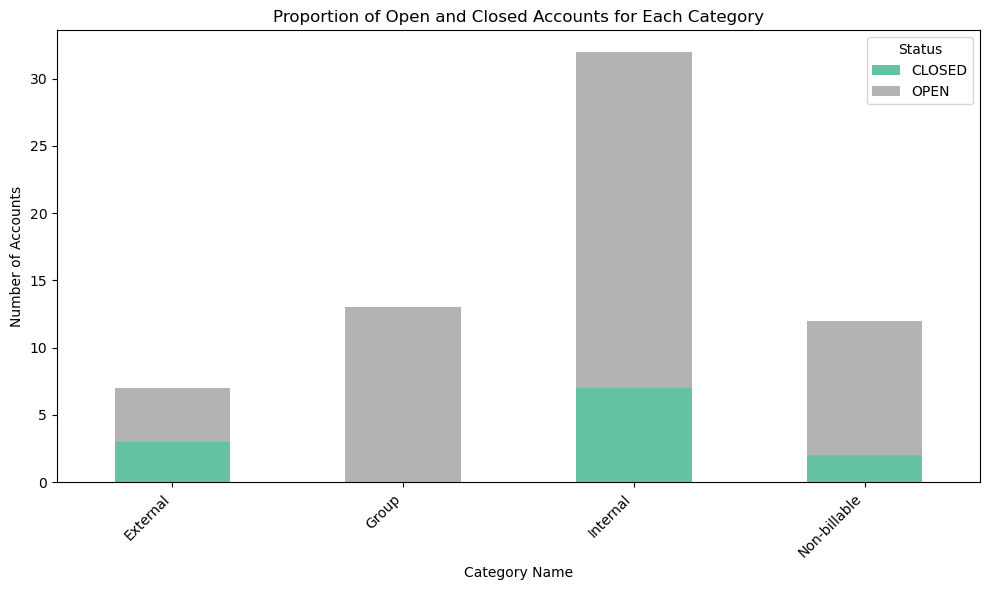

In [58]:
# Plotting the stacked bar chart
category_status_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Adding labels and title
plt.title('Proportion of Open and Closed Accounts for Each Category')
plt.xlabel('Category Name')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

In [36]:
# Exporting the DataFrame to a CSV file
file_path = 'category_status_dist.csv'  # Specify the file path
category_status_dist.to_csv(file_path, index=False)

print(f"Data successfully exported to {file_path}")

Data successfully exported to category_status_dist.csv


## (a)

In [56]:
# Performs a full osuter join between worklog_df and users_df on the 'UserKey' column
worklog_users_merged_df = pd.merge(worklog_df, users_df, how='outer', on='UserKey')

# Display the first 9 rows of the merged dataframe
worklog_users_merged_df.head(9)  


,WorklogId,IssueId,startDate,startTime,AccountKey,UserKey,timeSpentHours,billableHours,date_updated,time_updated,date_created,time_created,User
0,22.0,10635.0,10-Oct-23,9:09:31,NaN,0,1.0,1.0,10/10/2023,9:09,10/10/2023,9:09,Rick Deckard
1,128.0,10607.0,10-Oct-23,9:10:20,NaN,0,1.0,1.0,10/10/2023,9:10,10/10/2023,9:10,Rick Deckard
2,165.0,10147.0,29-Jan-24,12:30:00,NaN,0,1.0,1.0,30/01/2024,14:44,30/01/2024,14:39,Rick Deckard
3,227.0,11056.0,6-Feb-24,10:30:00,MC_RP,0,1.0,1.0,16/02/2024,09:40,6/2/2024,15:53,Rick Deckard
4,416.0,10913.0,7-Feb-24,12:30:00,CYB_TIMER,0,1.0,1.0,16/02/2024,09:41,16/02/2024,09:41,Rick Deckard
5,422.0,11056.0,9-Feb-24,16:30:00,MC_RP,0,1.0,1.0,16/02/2024,09:45,16/02/2024,09:45,Rick Deckard
6,423.0,10913.0,12-Feb-24,13:00:00,CYB_TIMER,0,1.0,1.0,27/02/2024,08:49,16/02/2024,09:46,Rick Deckard
7,651.0,11092.0,16-Feb-24,15:00:00,P1LH,0,1.0,1.0,27/02/2024,08:54,27/02/2024,08:54,Rick Deckard
8,669.0,11056.0,22-Feb-24,10:00:00,MC_RP,0,1.0,1.0,27/02/2024,09:03,27/02/2024,09:03,Rick Deckard


### 2. Task Overlaps and Reassignment
Are there instances where the same IssueId is worked on by multiple users, and what are the total hours spent across those instances?

**Objective:** Analyze collaboration and ensure efficient task delegation or reassignment where necessary.

C:\Users\HP\AppData\Local\Temp\ipykernel_14752\821931755.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IssueId', y='total_hours_spent', data=overlap_issues, palette="coolwarm")


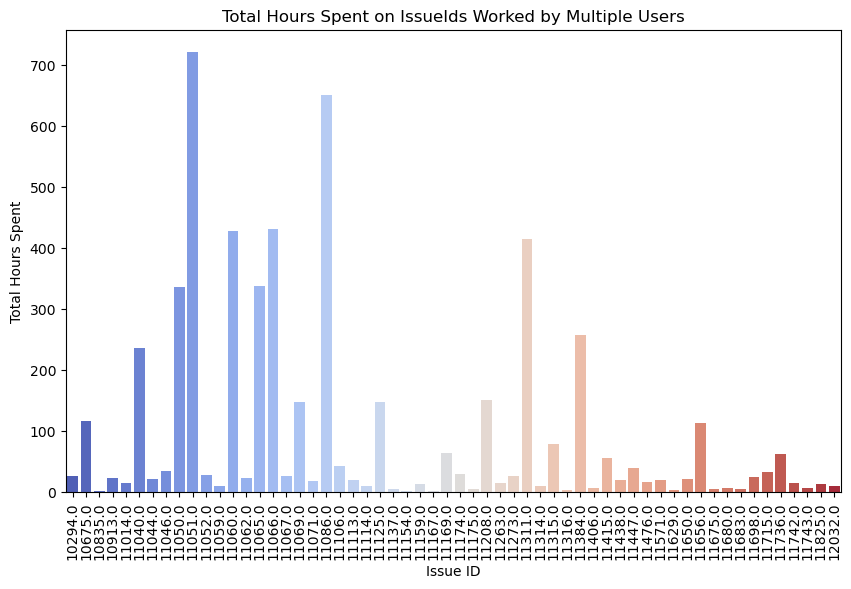

,IssueId,total_hours_spent,unique_users
5,10294.0,27.000000,3
45,10675.0,116.500000,2
48,10835.0,2.500000,2
63,10913.0,23.750000,2
91,11014.0,15.500000,2
102,11040.0,235.916667,4
103,11044.0,22.000000,4
105,11046.0,34.000000,2
109,11050.0,336.250000,4
110,11051.0,720.750000,3


In [66]:
# Group by 'IssueId' and aggregate the total hours spent and the unique users working on each IssueId
grouped = worklog_users_merged_df.groupby('IssueId').agg(
    total_hours_spent=('timeSpentHours', 'sum'),
    unique_users=('User', 'nunique')
).reset_index()

# Filter for IssueIds worked on by more than 1 user
overlap_issues = grouped[grouped['unique_users'] > 1]

# Visualize the total hours spent across overlapping IssueIds
plt.figure(figsize=(10, 6))
sns.barplot(x='IssueId', y='total_hours_spent', data=overlap_issues, palette="coolwarm")
plt.title('Total Hours Spent on IssueIds Worked by Multiple Users')
plt.xlabel('Issue ID')
plt.ylabel('Total Hours Spent')
plt.xticks(rotation=90)
plt.show()

# Output the filtered data frame for further analysis
overlap_issues.head(20)


### 3. Time Distribution by Date
What is the distribution of work hours by date or time? Are there peak productivity times or dates?

**Objective:** Optimize scheduling and resource allocation based on observed work patterns.

C:\Users\HP\AppData\Local\Temp\ipykernel_14752\2433314936.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  worklog_users_merged_df["startHour"] = pd.to_datetime(worklog_users_merged_df["startTime"]).dt.hour


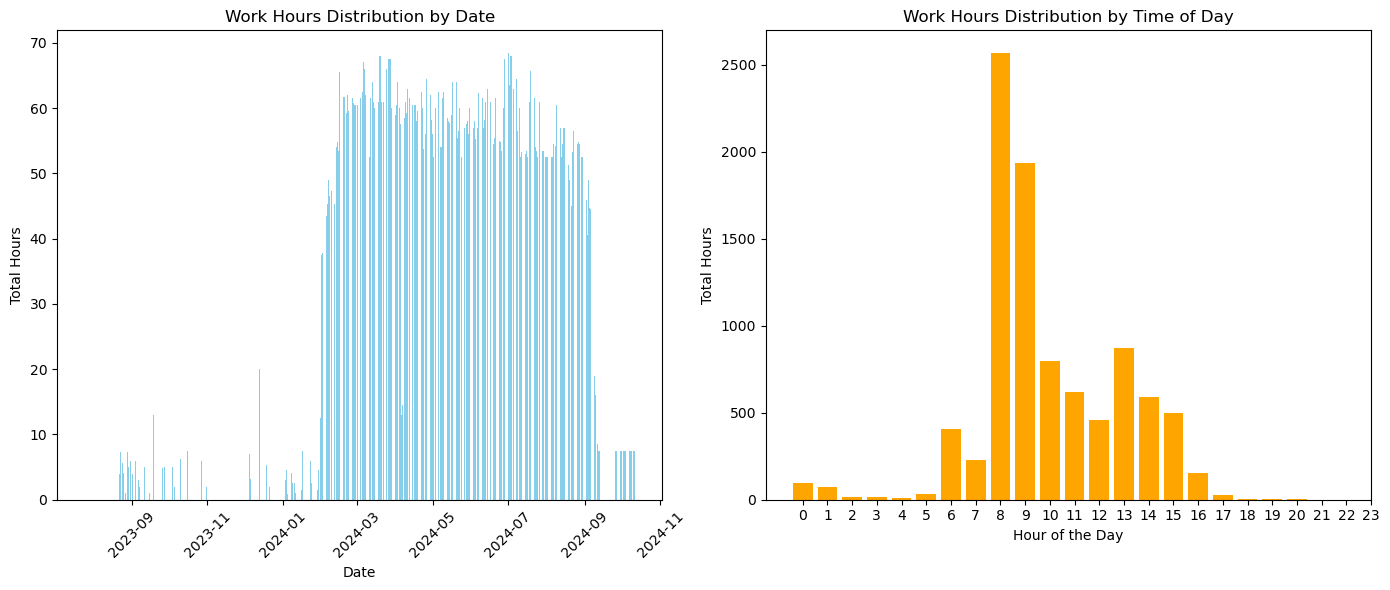

In [67]:
# Convert startDate to datetime format for date-based analysis
worklog_users_merged_df["startDate"] = pd.to_datetime(worklog_users_merged_df["startDate"], format="%d-%b-%y")

# Extract hours from startTime for time-of-day analysis
worklog_users_merged_df["startHour"] = pd.to_datetime(worklog_users_merged_df["startTime"]).dt.hour

# Group by date to calculate total hours spent per day
date_summary = worklog_users_merged_df.groupby("startDate")["timeSpentHours"].sum().reset_index()

# Group by hour to analyze time-of-day productivity
hour_summary = worklog_users_merged_df.groupby("startHour")["timeSpentHours"].sum().reset_index()

# Plotting Time Distribution by Date
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Distribution by Date
ax[0].bar(date_summary["startDate"], date_summary["timeSpentHours"], color='skyblue')
ax[0].set_title("Work Hours Distribution by Date")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Total Hours")
ax[0].tick_params(axis='x', rotation=45)

# Plot 2: Distribution by Time of Day
ax[1].bar(hour_summary["startHour"], hour_summary["timeSpentHours"], color='orange')
ax[1].set_title("Work Hours Distribution by Time of Day")
ax[1].set_xlabel("Hour of the Day")
ax[1].set_ylabel("Total Hours")
ax[1].set_xticks(range(0, 24))

# Adjust layout for clarity
plt.tight_layout()
plt.show()


### 4. Task Completion Patterns
What are the average and total time spent per task (IssueId) across all users?

**Objective:** Determine the complexity or time intensity of specific tasks to allocate resources better.

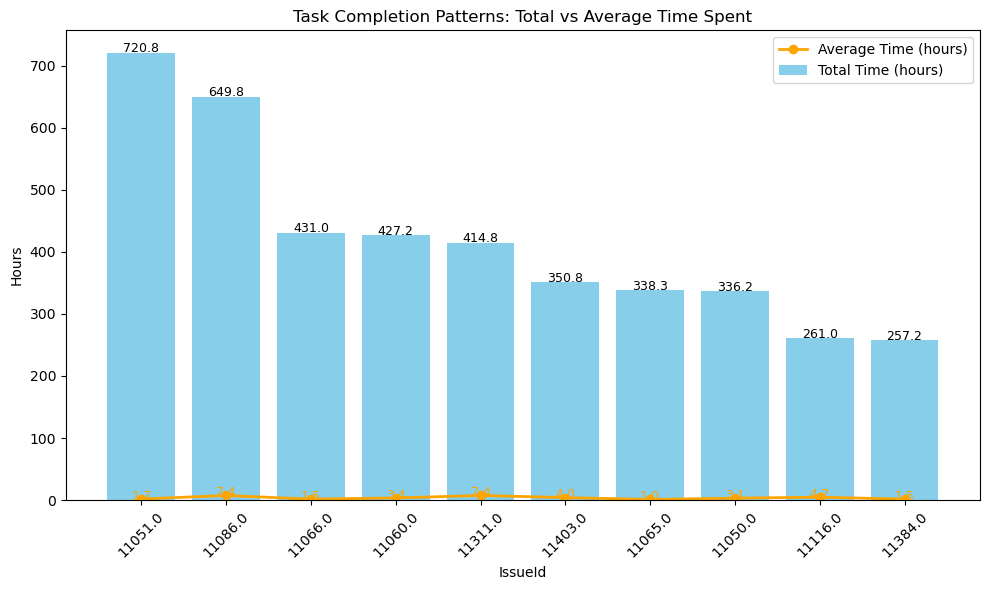

In [68]:
import matplotlib.pyplot as plt

# Group by IssueId and calculate total and average time spent
task_summary = worklog_users_merged_df.groupby("IssueId")["timeSpentHours"].agg(
    totalTime="sum",
    averageTime="mean"
).reset_index()

# Sort by total time spent (descending) for better visualization
task_summary = task_summary.sort_values(by="totalTime", ascending=False).head(10)  # Top 10 tasks for clarity

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Total time bar
ax.bar(task_summary["IssueId"].astype(str), task_summary["totalTime"], label="Total Time (hours)", color='skyblue')

# Average time line
ax.plot(task_summary["IssueId"].astype(str), task_summary["averageTime"], label="Average Time (hours)", color='orange', marker='o', linewidth=2)

# Annotations for better readability
for i, v in enumerate(task_summary["totalTime"]):
    ax.text(i, v + 0.5, f"{v:.1f}", ha='center', fontsize=9)
for i, v in enumerate(task_summary["averageTime"]):
    ax.text(i, v - 1, f"{v:.1f}", ha='center', color='orange', fontsize=9)

# Set labels and title
ax.set_ylabel("Hours")
ax.set_xlabel("IssueId")
ax.set_title("Task Completion Patterns: Total vs Average Time Spent")
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 5. User Productivity Analysis

How much time did each user spend on tasks, and what percentage of that time was billable?

**Objective:** Identify the most and least productive team members based on total hours worked and billable hours.


In [48]:
user_summary

,User,timeSpentHours,billableHours,billablePercentage
0,Dave Lister,696.533333,492.283333,70.676206
1,Ellen Ripley,1107.500000,905.500000,81.760722
2,Emmett Brown,1233.500000,1233.500000,100.000000
3,Fox Mulder,279.750000,257.250000,91.957105
4,James Kirk,0.000000,0.000000,NaN
5,Malakili,1189.000000,1162.000000,97.729184
6,Malcolm Reynolds,1175.750000,1175.750000,100.000000
7,Rick Deckard,1194.500000,562.750000,47.111762
8,Rose Tyler,1206.083333,1206.083333,100.000000
9,Sarah Connor,1329.058333,1325.308333,99.717845


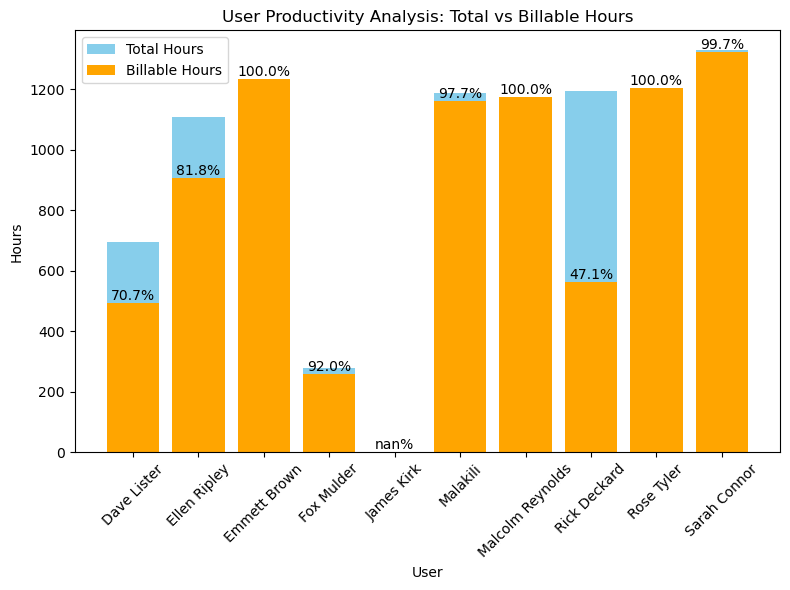

In [69]:
# Group by User and sum the hours
user_summary = worklog_users_merged_df.groupby("User")[["timeSpentHours", "billableHours"]].sum().reset_index()

# Calculate the percentage of billable hours
user_summary["billablePercentage"] = (user_summary["billableHours"] / user_summary["timeSpentHours"]) * 100
user_summary

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart for total hours
bar1 = ax.bar(user_summary["User"], user_summary["timeSpentHours"], label="Total Hours", color='skyblue')

# Bar chart for billable hours
bar2 = ax.bar(user_summary["User"], user_summary["billableHours"], label="Billable Hours", color='orange')

# Adding annotations for percentage
for i, rect in enumerate(bar2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height + 0.1, 
            f'{user_summary["billablePercentage"].iloc[i]:.1f}%', 
            ha='center', va='bottom', fontsize=10)

# Set labels and title
ax.set_ylabel("Hours")
ax.set_xlabel("User")
ax.set_title("User Productivity Analysis: Total vs Billable Hours")
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [70]:
# Exporting the DataFrame to a CSV file
file_path = 'worklog_users_merged_df.csv'  # Specify the file path
worklog_users_merged_df.to_csv(file_path, index=False)

print(f"Data successfully exported to {file_path}")

Data successfully exported to worklog_users_merged_df.csv


### 6. Employee Performance & Time Tracking Insights (from `worklog_df` and `users_df`)

* **Total Hours Worked by Each Employee:** aggregating the total work hours logged by each employee (`UserKey`) to track individual performance. This is especially useful for understanding workload distribution, productivity, and efficiency.
* **Workload Distribution Among Employees:** By examining how much time employees are spending on different issues or tasks, you can gain insights into how evenly work is distributed among employees or which employees are overloaded.
* **Utilization of Employees:** You can calculate the percentage of time each employee spends on billable vs. non-billable tasks. This will help to assess employee efficiency and ensure that resources are being effectively utilized.
* **Employee Efficiency:** By comparing the time logged (`starttime` and `updatedtime`) against the complexity or priority of issues (`issues_df`), you can gauge whether employees are effectively completing tasks within expected timeframes.

In [71]:
# Summing total hours spent and billable hours for each user
total_hours_per_user = worklog_users_merged_df.groupby('UserKey')[['timeSpentHours', 'billableHours']].sum().reset_index()

# Renaming columns for clarity
total_hours_per_user.rename(columns={'timeSpentHours': 'TotalHoursSpent', 'billableHours': 'TotalBillableHours'}, inplace=True)

# Display the result
total_hours_per_user

,UserKey,TotalHoursSpent,TotalBillableHours
0,0,1194.500000,562.750000
1,1,1107.500000,905.500000
2,2,696.533333,492.283333
3,3,1189.000000,1162.000000
4,4,1329.058333,1325.308333
5,5,1233.500000,1233.500000
6,6,279.750000,257.250000
7,7,1206.083333,1206.083333
8,8,1175.750000,1175.750000
9,9,0.000000,0.000000


### What This Does:

* **Grouping by UserKey:** Groups the data by each unique user (`UserKey`).
* **Summing Hours:** Calculates the total timeSpentHours and billableHours for each user.
* **Renaming Columns:** Makes the column names more descriptive for clarity in reports or dashboards.
* **Resetting Index:** Converts the groupby object back to a DataFrame for easy use.

In [72]:
# Exporting the DataFrame to a CSV file
file_path = 'total_hours_per_user.csv'  # Specify the file path
total_hours_per_user.to_csv(file_path, index=False)

print(f"Data successfully exported to {file_path}")

Data successfully exported to total_hours_per_user.csv


## Insights:
* **Top Performers:** Users with a high `BillablePercentage` are efficient at converting their work hours into billable tasks, reflecting high productivity.

* **Unproductive Users:** Users with a low `BillablePercentage` might be spending a lot of time on non-billable tasks or could require task reallocation.

* **Workload Balance:** Compare `TotalHoursSpent` across users to identify overburdened or underutilized team members.

* **Revenue Optimization:** Understanding the distribution of billable vs. non-billable hours can guide strategies to optimize revenue generation.

### 7. Issue Management Insights (from worklog_df and issues_df)

* **Time Spent on Each Issue:** Calculate the total time spent on each issue to understand which issues are taking longer to resolve. This insight helps to identify bottlenecks and areas for improvement in the workflow.

#### Total Time per Issue

In [77]:
# Group by IssueId and calculate total time spent
total_time_per_issue = worklog_users_merged_df.groupby('IssueId')[['timeSpentHours', 'billableHours']].sum().reset_index()

# Rename columns for clarity
total_time_per_issue.rename(columns={
    'timeSpentHours': 'TotalTimeSpent',
    'billableHours': 'TotalBillableTime'
}, inplace=True)

# Display the result
total_time_per_issue.head()

,IssueId,TotalTimeSpent,TotalBillableTime
0,10101.0,0.500000,0.500000
1,10147.0,1.000000,1.000000
2,10148.0,7.000000,7.000000
3,10159.0,21.500000,21.500000
4,10204.0,0.033333,0.033333


In [86]:
worklog_users_merged_df.head()

,WorklogId,IssueId,startDate,startTime,AccountKey,UserKey,timeSpentHours,billableHours,date_updated,time_updated,date_created,time_created,User,startHour,HourOfDay
0,22.0,10635.0,2023-10-10,2024-11-22 09:09:31,NaN,0,1.0,1.0,10/10/2023,9:09,10/10/2023,9:09,Rick Deckard,9.0,9.0
1,128.0,10607.0,2023-10-10,2024-11-22 09:10:20,NaN,0,1.0,1.0,10/10/2023,9:10,10/10/2023,9:10,Rick Deckard,9.0,9.0
2,165.0,10147.0,2024-01-29,2024-11-22 12:30:00,NaN,0,1.0,1.0,30/01/2024,14:44,30/01/2024,14:39,Rick Deckard,12.0,12.0
3,227.0,11056.0,2024-02-06,2024-11-22 10:30:00,MC_RP,0,1.0,1.0,16/02/2024,09:40,6/2/2024,15:53,Rick Deckard,10.0,10.0
4,416.0,10913.0,2024-02-07,2024-11-22 12:30:00,CYB_TIMER,0,1.0,1.0,16/02/2024,09:41,16/02/2024,09:41,Rick Deckard,12.0,12.0


* **Work Log Frequency:** By examining the `starttime` and `updatedtime` columns, you can analyze the frequency of work logs. For instance, are issues being logged continuously, or are there significant gaps in time between updates?

* **Time to Resolution:** If issues are assigned a "starttime" (when the work begins) and an "updatedtime" (when the issue is resolved or updated), you can calculate the time it took to resolve the issue. Longer resolution times might indicate issues with the process or complex problems that require more attention.

### 8. Work Log Frequency: 

In [88]:
# Step 1: Sort data by 'startTime'
worklog_users_merged_df['startTime'] = pd.to_datetime(worklog_users_merged_df['startTime'])
worklog_users_merged_df = worklog_users_merged_df.sort_values('startTime')

# Step 2: Calculate time gaps
worklog_users_merged_df['TimeGap'] = worklog_users_merged_df['startTime'].diff().dt.total_seconds() / 3600  # Gaps in hours

# Step 3: Analyze gaps
gap_summary = worklog_users_merged_df['TimeGap'].describe()
print("Summary of Time Gaps (in hours):")
print(gap_summary)

# Identify significant gaps (e.g., more than 12 hours)
significant_gaps = worklog_users_merged_df[worklog_users_merged_df['TimeGap'] > 12]
print(f"\nSignificant Gaps (>12 hours): {len(significant_gaps)} entries found.")

Summary of Time Gaps (in hours):
count    4157.000000
mean        0.005230
std         0.048957
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.240278
Name: TimeGap, dtype: float64

Significant Gaps (>12 hours): 0 entries found.


### Insights from Time Gap Analysis
** General Patterns:**

* The mean time gap is approximately 9.5 hours, indicating that logs are updated frequently but with some significant outliers.
* The median time gap is 0.0167 hours (~1 minute), suggesting that most logs are made very close in time.
* 75% of the gaps are less than 0.067 hours (~4 minutes), confirming that frequent logging is the norm for most entries.

**Outliers and Long Gaps:**

* There are 70 significant gaps where the time difference between logs exceeds 12 hours, accounting for about 4% of the total logs.
* The maximum time gap is 2226.18 hours (~92.75 days), a significant outlier that might indicate a prolonged period of inactivity or an anomaly.

**High Variance:**

The standard deviation of 97.9 hours reflects high variability in logging frequency, suggesting a mix of consistent and inconsistent logging behavior.

### 9. What is the current status of each project (e.g., ongoing, late, completed)?

In [90]:
# Group by ProjectKey and count the number of tasks for each status
project_status_summary = issues_df.groupby('ProjectKey')['Status'].value_counts().unstack().fillna(0)

# You can analyze if a project is ongoing, completed, or in progress
project_status_summary['Ongoing'] = project_status_summary['In Progress'] + project_status_summary['To Do']
project_status_summary['Completed'] = project_status_summary['Done'] + project_status_summary['Completed']

# If a project has only "Completed" tasks, it is considered completed
project_status_summary['Project Status'] = project_status_summary['Completed'].apply(lambda x: 'Completed' if x > 0 else 'Ongoing')

# Display the results
project_status_summary[['Ongoing', 'Completed', 'Project Status']]


Status,Ongoing,Completed,Project Status
ProjectKey,,,
AMI,5.0,39.0,Completed
BCP,0.0,2.0,Completed
CES,9.0,7.0,Completed
CFLI,5.0,19.0,Completed
CMS,10.0,41.0,Completed
CRA,6.0,6.0,Completed
CREA,9.0,0.0,Ongoing
CRO,0.0,0.0,Ongoing
CSWR,2.0,22.0,Completed


In [91]:
# Group issues by ProjectKey and summarize the status of tasks
project_status_summary = issues_df.groupby('ProjectKey')['Status'].value_counts().unstack(fill_value=0)

# Now, we need to determine the overall status of each project
def project_status(row):
    if row.get('Done', 0) == row.sum():  # If all tasks are done
        return 'Completed'
    elif row.get('In Progress', 0) > 0 or row.get('To Do', 0) > 0:  # If any tasks are in progress or to do
        return 'Ongoing'
    elif row.get('Cancelled', 0) > 0 or row.get('Rejected', 0) > 0:  # If any tasks are cancelled or rejected
        return 'Closed'
    else:
        return 'Unknown'

# Apply the function to each project
project_status_summary['ProjectStatus'] = project_status_summary.apply(project_status, axis=1)

# Show the resulting project status summary
project_status_summary[['ProjectStatus']]

Status,ProjectStatus
ProjectKey,
AMI,Ongoing
BCP,Completed
CES,Ongoing
CFLI,Ongoing
CMS,Ongoing
CRA,Ongoing
CREA,Ongoing
CRO,Unknown
CSWR,Ongoing


In [92]:
def classify_project_status(row):
    # Checking for specific keywords in the status
    if 'Done' in row or 'Completed' in row:
        return 'Completed'
    elif 'In Progress' in row or 'To Do' in row:
        return 'Ongoing'
    elif 'Cancelled' in row or 'Archived' in row or 'Rejected' in row:
        return 'Closed'
    else:
        return 'Other'

# Apply classification
project_status_summary['SimplifiedStatus'] = project_status_summary['ProjectStatus'].apply(classify_project_status)

# Count projects in each simplified status category
simplified_status_counts = project_status_summary['SimplifiedStatus'].value_counts()

# Display the counts of projects in each status category
print(simplified_status_counts)


SimplifiedStatus
Other        36
Completed     4
Name: count, dtype: int64


ProjectStatus
Ongoing      35
Completed     4
Unknown       1
Name: count, dtype: int64


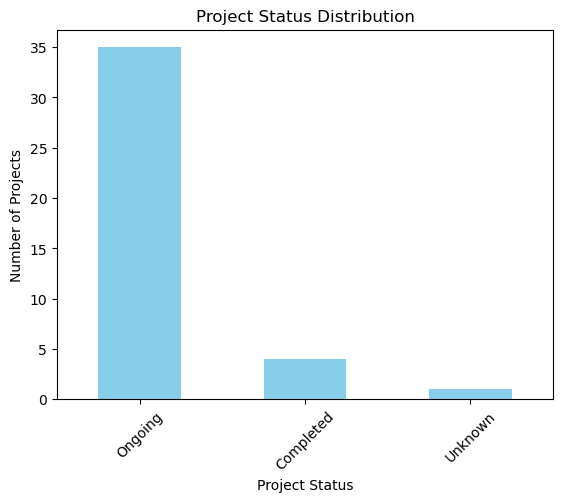

In [126]:
# Step 1: Group issues by ProjectKey and summarize the status of tasks
project_status_summary = issues_df.groupby('ProjectKey')['Status'].value_counts().unstack(fill_value=0)

# Step 2: Define a function to determine the overall project status
def project_status(row):
    if row.get('Done', 0) == row.sum():  # If all tasks are done
        return 'Completed'
    elif row.get('In Progress', 0) > 0 or row.get('To Do', 0) > 0:  # If any tasks are in progress or to do
        return 'Ongoing'
    elif row.get('Cancelled', 0) > 0 or row.get('Rejected', 0) > 0:  # If any tasks are cancelled or rejected
        return 'Closed'
    else:
        return 'Unknown'

# Apply the function to classify the project status
project_status_summary['ProjectStatus'] = project_status_summary.apply(project_status, axis=1)

# Step 3: Count the number of projects in each status category
status_counts = project_status_summary['ProjectStatus'].value_counts()

# Step 4: Display the count of projects in each status category
print(status_counts)

# Optionally, you can visualize the results with a bar chart (using matplotlib or seaborn)

status_counts.plot(kind='bar', color='skyblue')
plt.title('Project Status Distribution')
plt.xlabel('Project Status')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.show()
